In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [4]:
data = pd.read_csv('/kaggle/input/russia-real-estate-20182021/all_v2.csv')

In [8]:
data.isna().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

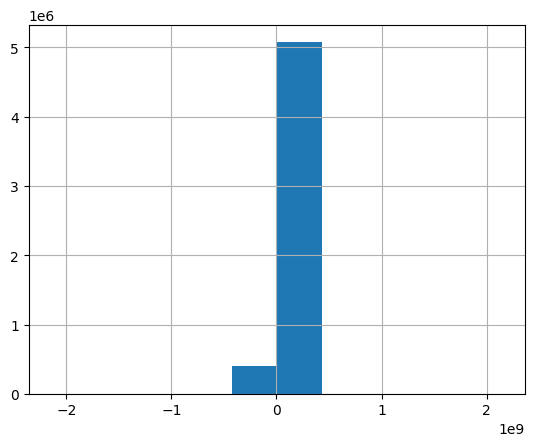

In [9]:
data['price'].hist();

In [10]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned = data[(data['price'] >= lower_bound)&(data['price']<=upper_bound)]

print(f"Исходный размер: {data.shape[0]}")
print(f"Размер после очистки: {data_cleaned.shape[0]}")

Исходный размер: 5477006
Размер после очистки: 5044118


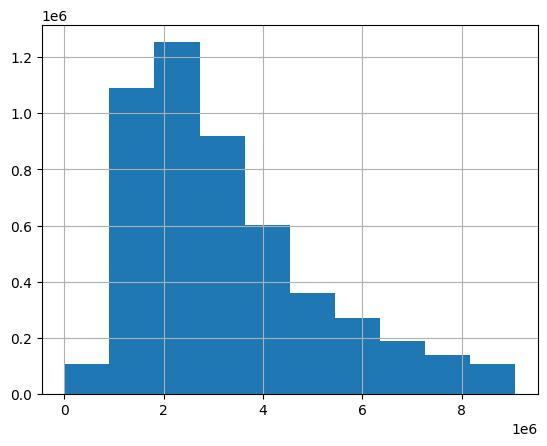

In [11]:
data_cleaned['price'].hist();

In [13]:
features = data_cleaned[['geo_lat','geo_lon','region','building_type','levels','rooms','area','kitchen_area']]
target = data_cleaned['price']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

In [22]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr_mse = mean_squared_error(y_test, lr_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)

lr_mape = (mean_absolute_error(y_test, lr_predictions) / y_test.mean()) * 100
dt_mape = (mean_absolute_error(y_test, dt_predictions) / y_test.mean()) * 100

print(f"Linear Regression MSE: {lr_mse:.2f}, MAPE {lr_mape:.2f}%")
print(f"Linear Tree MSE: {dt_mse:.2f}, MAPE {dt_mape:.2f}%")


Linear Regression MSE: 2056548733356.52, MAPE 33.02%
Linear Tree MSE: 515308192296.17, MAPE 11.62%


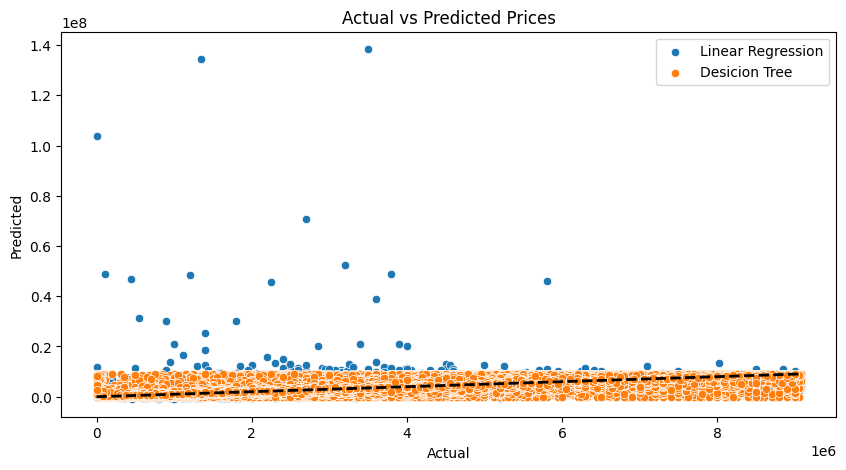

In [25]:
import matplotlib.pyplot  as plt
import seaborn as sns 

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=lr_predictions, label='Linear Regression')
sns.scatterplot(x=y_test, y=dt_predictions, label='Desicion Tree')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()
